# Phase 1: Business Case
[Bukas.ph](https://bukas.ph/) is a Y Combinator-backed FinTech startup on a mission to make education affordable in the Philippines. Through their lending platform, students pursuing Diploma, Bachelors, Masters, and non-degree short-courses can obtain affordable financing to fund their tertiary education and training.
<br/>

Their major point of interest is: <br/>
**What kind of students are registering in the platform?**
1. For those who do not finish their registration, where are the bottlenecks and what can be done about it to increase completed registrations?
2. For those who finish, what are their personas and how can the company target them more accurately in terms of marketing?

## Set up workspace

In [1]:
#Standard and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='oceans16')

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Inspect dataset

In [2]:
df = pd.read_excel('Bukas_Cleaned.xlsx', index_col='applicant_id')
df.head()

,status,borrower_province_id,borrower_city_id,education_school_id,requested_debt_to_burden_ratio,requested_principal,guarantor_relationship_to_borrower,guarantor_is_renting,provisional_debt_to_burden_ratio,provisional_monthly_repayment,provisional_principal,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,guarantor_monthly_rent,guarantor_number_of_dependents,borrower_age,education_category,active_interest,working_student
applicant_id,,,,,,,,,,,,,,,,,,,,
A0001,NEW,NaN,NaN,NaN,0.0,0.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,19.816199,NaN,False,False
A0002,NEW,NaN,NaN,NaN,0.0,0.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,19.816199,NaN,True,False
A0003,NEW,72.0,137603.0,3.0,0.0,25000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,19.000000,engineering,False,False
A0004,NEW,68.0,133901.0,3.0,0.0,172000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,35.000000,engineering,False,False
A0005,NEW,NaN,NaN,NaN,0.0,40000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,19.816199,NaN,False,False


In [3]:
df.shape

(2264, 20)

In [4]:
df.describe()

,borrower_province_id,borrower_city_id,education_school_id,requested_debt_to_burden_ratio,requested_principal,provisional_debt_to_burden_ratio,provisional_monthly_repayment,provisional_principal,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,guarantor_monthly_rent,borrower_age
count,1283.000000,1283.000000,926.000000,2264.000000,2.264000e+03,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,46.216680,94386.660951,3.923326,0.057119,3.597512e+04,0.846741,228.975220,2270.828622,2747.702633,408.749152,68.124859,581.506625,20.476476
std,26.468976,48698.428269,1.772327,0.494096,2.044920e+05,0.401065,906.127603,8986.389441,10873.531224,1617.550099,269.591683,3380.789453,3.308738
min,1.000000,12810.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,18.000000,42113.500000,2.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,68.000000,133905.000000,4.000000,0.000000,1.705000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.816199
75%,70.000000,137501.000000,6.000000,0.000000,4.353350e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
max,86.000000,175914.000000,7.000000,17.285700,8.698897e+06,8.000000,6554.166700,65000.000000,78650.000000,11700.000000,1950.000000,80000.000000,48.000000


In [5]:
df.describe(include='O')

,status,guarantor_relationship_to_borrower,education_category
count,2264,531,926
unique,4,4,9
top,NEW,Immediate Family,hospitality
freq,1353,368,219


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, A0001 to A2273
Data columns (total 20 columns):
status                                2264 non-null object
borrower_province_id                  1283 non-null float64
borrower_city_id                      1283 non-null float64
education_school_id                   926 non-null float64
requested_debt_to_burden_ratio        2264 non-null float64
requested_principal                   2264 non-null float64
guarantor_relationship_to_borrower    531 non-null object
guarantor_is_renting                  2264 non-null bool
provisional_debt_to_burden_ratio      2264 non-null float64
provisional_monthly_repayment         2264 non-null float64
provisional_principal                 2264 non-null int64
provisional_total_balance             2264 non-null float64
provisional_total_interest_fee        2264 non-null float64
provisional_total_origination_fee     2264 non-null float64
guarantor_monthly_rent                2264 non-null int64
guar

### Observation:
1. Out of the initial 2264 rows, we are keeping only 926 (those with education information) to keep data meaningful.
2. 1s in `provisional_debt_burden_ratio` should be transformed to 0s because no guarantor salary info was provided.
3. We can get prinicipal_amount based on requested_principal and provisional_principal, whichever data is available.
4. Since values on requested loan details are more conplete than provisional, we will keep these columns and drop the other.
5. There are null values which we easily fill with 0s later in preparation for scaling and clustering.

# Phase 2: Data Preparation

## Clean the data

### Keep relevant rows only
With at least education information

In [7]:
df = df[df['education_school_id'].notnull()] ; df.head()

,status,borrower_province_id,borrower_city_id,education_school_id,requested_debt_to_burden_ratio,requested_principal,guarantor_relationship_to_borrower,guarantor_is_renting,provisional_debt_to_burden_ratio,provisional_monthly_repayment,provisional_principal,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,guarantor_monthly_rent,guarantor_number_of_dependents,borrower_age,education_category,active_interest,working_student
applicant_id,,,,,,,,,,,,,,,,,,,,
A0003,NEW,72.0,137603.0,3.0,0.0,25000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,19.0,engineering,False,False
A0004,NEW,68.0,133901.0,3.0,0.0,172000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,35.0,engineering,False,False
A0006,NEW,72.0,137604.0,3.0,0.0,30000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,34.0,engineering,False,False
A0011,NEW,86.0,166724.0,3.0,0.0,30000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,25.0,engineering,False,False
A0014,NEW,18.0,42113.0,2.0,0.0,50000.0,NaN,False,1.0,0.0,0,0.0,0.0,0.0,0,False,17.0,health,False,False


In [8]:
df.shape

(926, 20)

### Transform values on `provisional_debt_to_burden_ratio`

In [9]:
#Change 1s to 0s
df['provisional_debt_to_burden_ratio'][df['provisional_debt_to_burden_ratio']==1.0] = 0.0

In [10]:
#Confirm
df[df['provisional_debt_to_burden_ratio']==1.0]

,status,borrower_province_id,borrower_city_id,education_school_id,requested_debt_to_burden_ratio,requested_principal,guarantor_relationship_to_borrower,guarantor_is_renting,provisional_debt_to_burden_ratio,provisional_monthly_repayment,provisional_principal,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,guarantor_monthly_rent,guarantor_number_of_dependents,borrower_age,education_category,active_interest,working_student
applicant_id,,,,,,,,,,,,,,,,,,,,


In [11]:
#Put columns to list
cols = df.columns.tolist()

In [12]:
for col in cols:
    print(col)
    print(df[col].value_counts())
    print('\n')

status
INITIAL_OFFER_ACCEPTED    425
SUBMITTED                 204
INITIAL_OFFER             184
NEW                       113
Name: status, dtype: int64


borrower_province_id
70.0    191
72.0    165
68.0     87
18.0     85
11.0     62
71.0     58
21.0     55
19.0     41
17.0     15
4.0      13
15.0     11
20.0     11
13.0     10
12.0      8
24.0      8
7.0       8
3.0       7
37.0      7
29.0      6
32.0      6
14.0      5
6.0       5
35.0      5
44.0      5
10.0      4
36.0      4
39.0      4
50.0      3
31.0      3
1.0       3
40.0      3
59.0      3
41.0      2
27.0      2
74.0      2
57.0      2
53.0      2
33.0      2
47.0      2
2.0       2
76.0      1
65.0      1
58.0      1
16.0      1
23.0      1
64.0      1
86.0      1
8.0       1
Name: borrower_province_id, dtype: int64


borrower_city_id
137404.0    93
137401.0    44
137602.0    37
137607.0    34
137501.0    34
137403.0    33
137605.0    32
42103.0     31
133906.0    30
137604.0    25
133901.0    23
137601.0    21
45802.0

### Derive `principal_amount`

In [13]:
df['principal_amount'] = np.where(df['provisional_principal']!=0, df['provisional_principal'], df['requested_principal'])

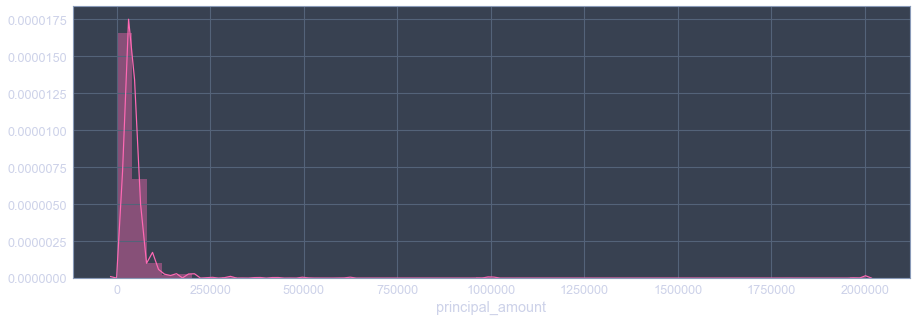

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['principal_amount'], color='hotpink')

### Compare `guarantor_is_renting` and `guarantor_monthly_rent`

In [15]:
df['guarantor_is_renting'].value_counts()

False    811
True     115
Name: guarantor_is_renting, dtype: int64

In [16]:
df['guarantor_monthly_rent'].value_counts().sort_index().head()

0       786
956       1
1500      2
1800      5
2000      3
Name: guarantor_monthly_rent, dtype: int64

There is a mismatch between the number of guarantor's who were reported renting and data on their monthly rent. We'll use `OR` to define whether the guarantor is indeed renting.

In [17]:
#Convert monthly rent values to bool
df['guarantor_monthly_rent'] = df['guarantor_monthly_rent']!=0

In [18]:
df['guarantor_monthly_rent'].value_counts()

False    786
True     140
Name: guarantor_monthly_rent, dtype: int64

In [19]:
#Current values
df['guarantor_is_renting'].value_counts()

False    811
True     115
Name: guarantor_is_renting, dtype: int64

In [20]:
#Use or operator
df['guarantor_is_renting'] = (df['guarantor_is_renting'] | df['guarantor_monthly_rent'])

In [21]:
#New values
df['guarantor_is_renting'].value_counts()

False    786
True     140
Name: guarantor_is_renting, dtype: int64

### Drop unnecessary features

In [22]:
#Current shape
print('Current shape: (%d, %d)' % df.shape)

#Drop columns
drop_cols = ['requested_debt_to_burden_ratio', 'requested_principal', 
             'guarantor_monthly_rent', 
             'provisional_monthly_repayment', 'provisional_principal', 
             'provisional_total_balance', 'provisional_total_interest_fee', 
             'provisional_total_origination_fee']
             
df = df.drop(columns=drop_cols, axis=1)

#New shape
print('New shape: (%d, %d)' % df.shape)

Current shape: (926, 21)
New shape: (926, 13)


### Fill nans

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, A0003 to A2273
Data columns (total 13 columns):
status                                926 non-null object
borrower_province_id                  925 non-null float64
borrower_city_id                      925 non-null float64
education_school_id                   926 non-null float64
guarantor_relationship_to_borrower    509 non-null object
guarantor_is_renting                  926 non-null bool
provisional_debt_to_burden_ratio      926 non-null float64
guarantor_number_of_dependents        926 non-null bool
borrower_age                          926 non-null float64
education_category                    926 non-null object
active_interest                       926 non-null bool
working_student                       926 non-null bool
principal_amount                      926 non-null float64
dtypes: bool(4), float64(6), object(3)
memory usage: 76.0+ KB


In [24]:
df[(df['borrower_province_id'].isnull()) | (df['borrower_city_id'].isnull())]

,status,borrower_province_id,borrower_city_id,education_school_id,guarantor_relationship_to_borrower,guarantor_is_renting,provisional_debt_to_burden_ratio,guarantor_number_of_dependents,borrower_age,education_category,active_interest,working_student,principal_amount
applicant_id,,,,,,,,,,,,,
A1990,NEW,NaN,NaN,2.0,NaN,False,0.0,False,19.816199,baa,True,False,42000.0


Only one row has a null value.

In [25]:
#Impute values with mode
df.loc['A1990', 'borrower_province_id'] = df['borrower_province_id'].mode()[0]
df.loc['A1990', 'borrower_city_id'] = df['borrower_city_id'].mode()[0]

In [26]:
#Check
df.loc['A1990']

status                                    NEW
borrower_province_id                       70
borrower_city_id                       137404
education_school_id                         2
guarantor_relationship_to_borrower        NaN
guarantor_is_renting                    False
provisional_debt_to_burden_ratio            0
guarantor_number_of_dependents          False
borrower_age                          19.8162
education_category                        baa
active_interest                          True
working_student                         False
principal_amount                        42000
Name: A1990, dtype: object

## Preprocess data

### Convert cat features to number

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, A0003 to A2273
Data columns (total 13 columns):
status                                926 non-null object
borrower_province_id                  926 non-null float64
borrower_city_id                      926 non-null float64
education_school_id                   926 non-null float64
guarantor_relationship_to_borrower    509 non-null object
guarantor_is_renting                  926 non-null bool
provisional_debt_to_burden_ratio      926 non-null float64
guarantor_number_of_dependents        926 non-null bool
borrower_age                          926 non-null float64
education_category                    926 non-null object
active_interest                       926 non-null bool
working_student                       926 non-null bool
principal_amount                      926 non-null float64
dtypes: bool(4), float64(6), object(3)
memory usage: 116.0+ KB


In [28]:
df.status.value_counts()

INITIAL_OFFER_ACCEPTED    425
SUBMITTED                 204
INITIAL_OFFER             184
NEW                       113
Name: status, dtype: int64

In [29]:
df[df['status']=='INITIAL_OFFER_ACCEPTED'].shape

(425, 13)

In [30]:
df[(df['status']=='INITIAL_OFFER_ACCEPTED') & (df['guarantor_relationship_to_borrower'].notnull())].shape

(308, 13)

From accepting initial offer to actually answering anything about guarantor information, 117 applicants were already lost. To balance the cases before clustering (since **SUBMITTED** only has 204 observations vs 722 total in others), we decided to decrease the threshold of successful conversion to include applications that reached `guarantor_relationship_to_borrower`. 

<br/>

Hence, all rows with non-null `guarantor_relationship_to_borrower` values will be included in a subset dataset called `active_leads`. Applicants that never reached submission status will be in another subset dataset called `inactive_leads`. Note that the two subsets are not mutually exclusive for the purpose of preparing dataset for clustering which would ideally have more rows given the number of features and their respective classes.

#### Prepare copies of df or index references

In [31]:
active_leads_index = df[df['guarantor_relationship_to_borrower'].notnull()].index.tolist()

In [32]:
inactive_leads_index = df[df['status'] != 'SUBMITTED'].index.tolist()

In [33]:
df_num = df.copy()
df.shape

(926, 13)

#### Convert cat features to number (cont.)

In [34]:
status_map = {'NEW' : 1, 'INITIAL_OFFER' : 2, 'INITIAL_OFFER_ACCEPTED' : 3, 
              'SUBMITTED' : 4}

df_num['status'] = df_num['status'].map(status_map)

In [35]:
df.guarantor_relationship_to_borrower.value_counts()

Immediate Family    354
Extended Family      62
Self                 60
Other                33
Name: guarantor_relationship_to_borrower, dtype: int64

In [36]:
relationship_map = {'Immediate Family':1,'Extended Family':2, 'Self':3, 
                    'Other':4}
df_num['guarantor_relationship_to_borrower'] = df_num['guarantor_relationship_to_borrower'].map(relationship_map)

In [37]:
#Convert nans to 0s
df_num['guarantor_relationship_to_borrower'] = df_num['guarantor_relationship_to_borrower'].fillna(0)

In [38]:
category_map = dict(zip(df['education_category'].unique().tolist(), range(1,len(df['education_category'].value_counts().index.tolist())+1)))
category_map

{u'baa': 8,
 u'comm_arts': 5,
 u'education': 9,
 u'engineering': 1,
 u'health': 2,
 u'hospitality': 4,
 u'it': 6,
 u'liberal_law': 3,
 u'others': 7}

In [39]:
df_num['education_category'] = df_num['education_category'].map(category_map)

In [40]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, A0003 to A2273
Data columns (total 13 columns):
status                                926 non-null int64
borrower_province_id                  926 non-null float64
borrower_city_id                      926 non-null float64
education_school_id                   926 non-null float64
guarantor_relationship_to_borrower    926 non-null float64
guarantor_is_renting                  926 non-null bool
provisional_debt_to_burden_ratio      926 non-null float64
guarantor_number_of_dependents        926 non-null bool
borrower_age                          926 non-null float64
education_category                    926 non-null int64
active_interest                       926 non-null bool
working_student                       926 non-null bool
principal_amount                      926 non-null float64
dtypes: bool(4), float64(7), int64(2)
memory usage: 76.0+ KB


### Review correlation

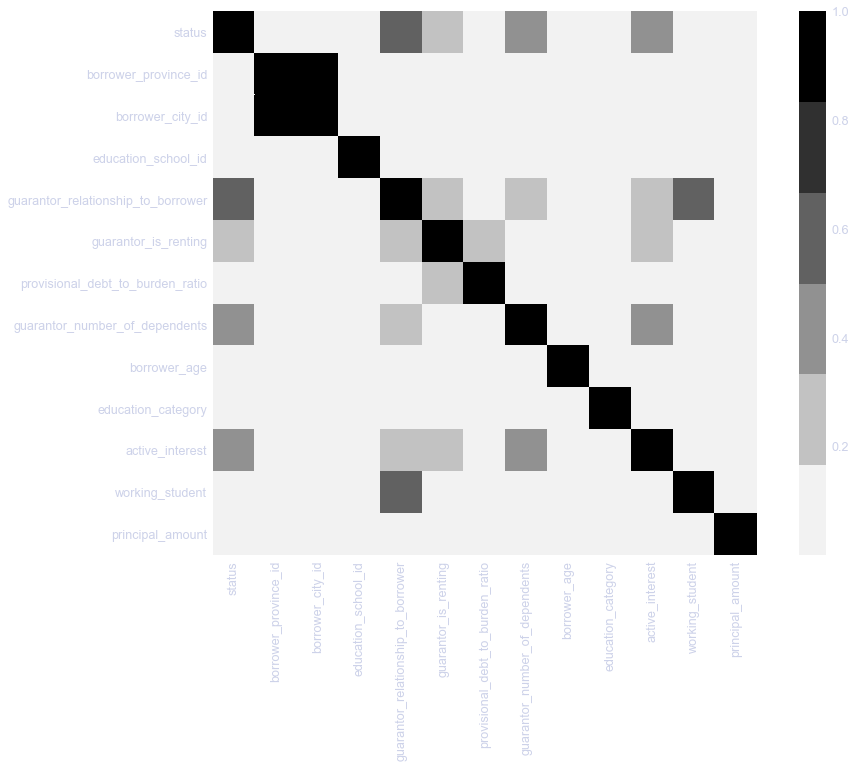

In [41]:
#Correlation matrix
corr = df_num.corr()

#Plot cf
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(abs(corr), xticklabels=corr.columns, yticklabels=corr.columns, 
            cmap=sns.light_palette('#000000'), square=True)

Province and city have multicolinearity. Guarator features are also correlated. Working student and relationship to borrower also has high correlation but for pca, we can drop working_student since we can still infer this behavioral feature from remaining ones.

### Scale the data

In [42]:
#Import scaler
from sklearn.preprocessing import MinMaxScaler

#Instantiate scaler
scaler = MinMaxScaler()

#Fit transform
scaled = scaler.fit_transform(df_num)

#Put to dataframa
df_scaled = pd.DataFrame(scaled, columns=df_num.columns, index=df_num.index)

#Cofirm
df_scaled.describe()

,status,borrower_province_id,borrower_city_id,education_school_id,guarantor_relationship_to_borrower,guarantor_is_renting,provisional_debt_to_burden_ratio,guarantor_number_of_dependents,borrower_age,education_category,active_interest,working_student,principal_amount
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,0.592513,0.544124,0.509561,0.487221,0.213283,0.151188,0.008100,0.101512,0.153981,0.447894,0.575594,0.064795,0.022233
std,0.308863,0.312364,0.299070,0.295388,0.259421,0.358426,0.046311,0.302169,0.124235,0.302777,0.494520,0.246296,0.055255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.200000,0.180445,0.166667,0.000000,0.000000,0.000000,0.000000,0.093750,0.250000,0.000000,0.000000,0.009505
50%,0.666667,0.788235,0.745642,0.500000,0.250000,0.000000,0.000000,0.000000,0.125000,0.375000,1.000000,0.000000,0.014507
75%,0.666667,0.811765,0.767778,0.833333,0.250000,0.000000,0.000000,0.000000,0.187500,0.625000,1.000000,0.000000,0.024512
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset was scaled successfully.

### Separate to subsets

In [43]:
active_leads = df_scaled.loc[active_leads_index,:]
inactive_leads = df_scaled.loc[inactive_leads_index,:]

print(active_leads.shape, inactive_leads.shape)

((509, 13), (722, 13))


In [44]:
#Reduce dimensions
active_leads = active_leads.drop(columns=['principal_amount', 'working_student', 'education_school_id', 'status', 'borrower_city_id', 'provisional_debt_to_burden_ratio'], axis=1)
inactive_leads = inactive_leads.drop(columns=['principal_amount', 'working_student', 'education_school_id', 'status', 'borrower_city_id', 'provisional_debt_to_burden_ratio'], axis=1)
print(active_leads.shape, inactive_leads.shape)

((509, 7), (722, 7))


In [45]:
active_leads.describe()

,borrower_province_id,guarantor_relationship_to_borrower,guarantor_is_renting,guarantor_number_of_dependents,borrower_age,education_category,active_interest
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.567087,0.388016,0.271120,0.182711,0.154161,0.460462,0.392927
std,0.309140,0.233688,0.444975,0.386810,0.103757,0.306190,0.488881
min,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211765,0.250000,0.000000,0.000000,0.093750,0.250000,0.000000
50%,0.788235,0.250000,0.000000,0.000000,0.125000,0.375000,0.000000
75%,0.823529,0.500000,1.000000,0.000000,0.187500,0.750000,1.000000
max,0.882353,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Phase 3: Clustering Active Leads

In [46]:
#Import libraries
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

## Principal Components Analysis (PCA)

### At 2 PCA
To check if the same clusters will emerge.

In [47]:
n = 2

#Get the first n PCA components only
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(active_leads)

#Output of PCA is a n-dimensional array
principalComponents 

#Put array into a neat DataFrame
pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['PC 1', 'PC 2']) 

In [48]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var = pca.explained_variance_ratio_.sum() * 100
print('Given this value, it can be said that %.2f%s of the variance of our data is explained by these %d Principal Components' % (explained_var, '%', n))

Given this value, it can be said that 56.04% of the variance of our data is explained by these 2 Principal Components


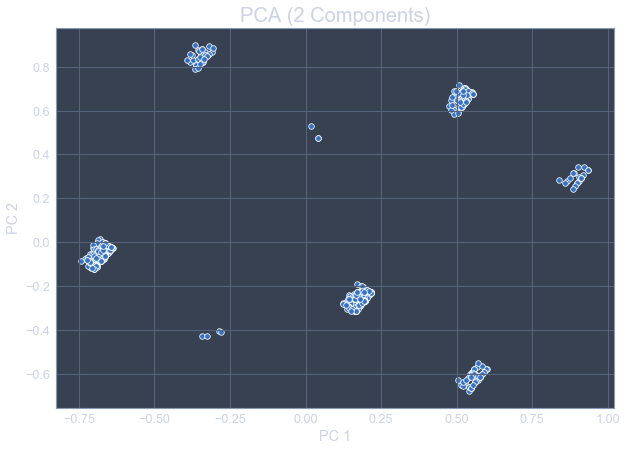

In [49]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components)', fontsize=20)
sns.scatterplot(ax = ax, x=pca_df['PC 1'], y=pca_df['PC 2'], legend=False)

### At 3 PCA

In [50]:
n = 3

#Get the first n PCA components only
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(active_leads)

#Output of PCA is a n-dimensional array
principalComponents 

#Put array into a neat DataFrame
pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['PC 1', 'PC 2', 'PC 3']) 

In [51]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var = pca.explained_variance_ratio_.sum() * 100
print('Given this value, it can be said that %.2f%s of the variance of our data is explained by these %d Principal Components' % (explained_var, '%', n))

Given this value, it can be said that 70.39% of the variance of our data is explained by these 3 Principal Components


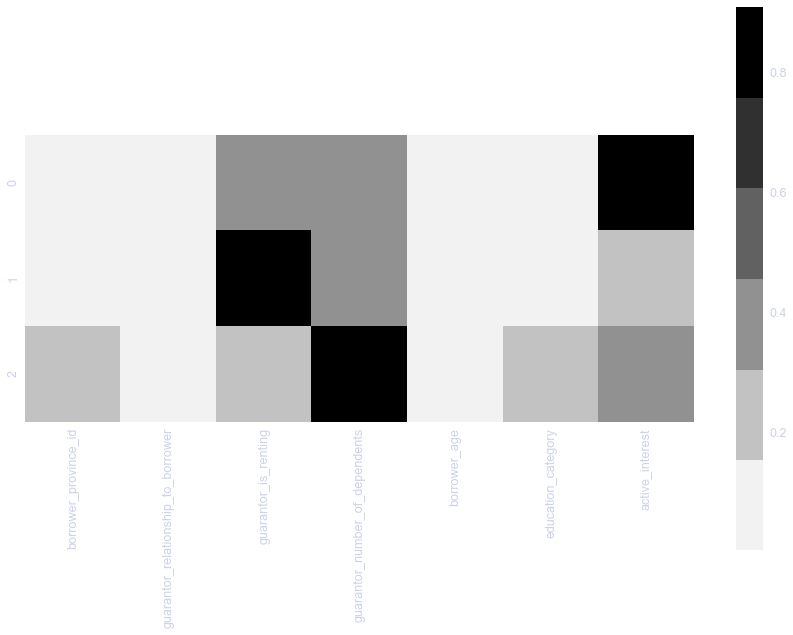

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(abs(pca.components_), square=True, xticklabels=active_leads.columns, 
            cmap=sns.light_palette('#000000'))

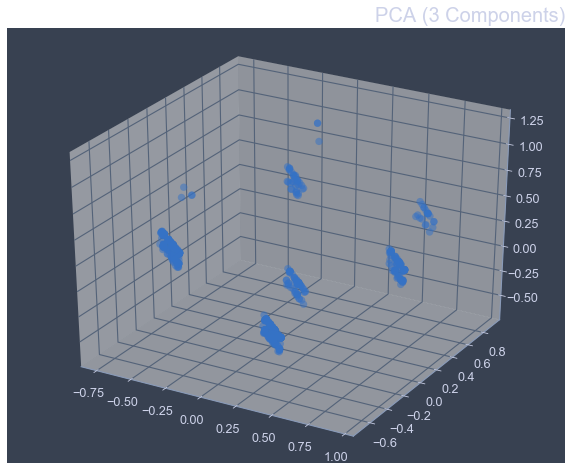

In [53]:
#Visualize

#Set up figure object
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_title('PCA (3 Components)', fontsize=20, loc='right')

#Assign PCA on x, y, z axes
xdata = pca_df['PC 1']
ydata = pca_df['PC 2']
zdata = pca_df['PC 3']

#Plot
ax.scatter3D(xdata, ydata, zdata, s=50, alpha=0.5, cmap='hot')

Visually inspecting both 2d and 3d projection, there's 6 distinct clusters. While 3 PCA has a higher explained variance, it doesn't significantly affect the way data points are grouped together. Therefore, 2d would be a simpler model but with similar outcome.

#### Find the optimal k via elbow method

Text(0,0.5,'Score')

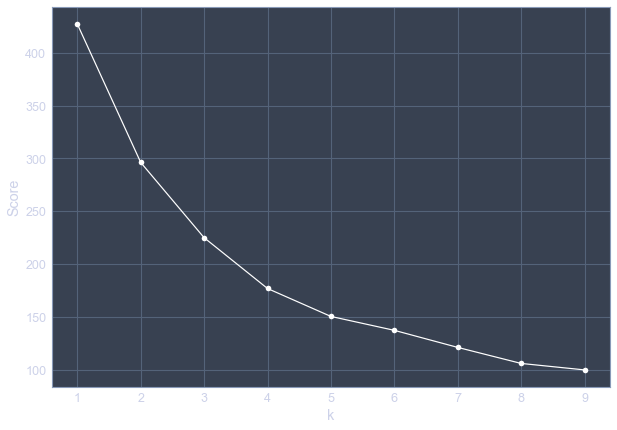

In [54]:
#Import library
from sklearn.cluster import KMeans

#Set range for k
range_n_clusters= range(1,10)

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30) 
    kmeans.fit(active_leads)
    score = kmeans.inertia_ #inertia is sum of squared errors
    scores.append(score)
    
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o', c='white')
plt.xlabel("k")
plt.ylabel("Score")

#### Elbow is at around 4-6 but we'll stick with 6 because it already confirms previous assumption.

#### Run K Means

In [63]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=8, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(active_leads)

#Output of K-Means is the cluster label
k8_labels = kmeans.labels_

#Attach labels to a new copy of original DataFrame
#active_leads_labeled = active_leads.copy()
pca_df['cluster'] = k8_labels

#View the dataset
pca_df.head()

,PC 1,PC 2,PC 3,cluster
0,0.513165,0.677293,-0.276376,2
1,0.529410,0.699709,-0.332220,2
2,0.528395,0.644833,-0.107907,2
3,0.175919,-0.230638,-0.528392,6
4,0.493156,0.671082,-0.238407,2


In [64]:
#Check for balance between classes
pca_df['cluster'].value_counts().sort_index()

0    83
1    65
2    79
3    93
4    69
5    38
6    61
7    21
Name: cluster, dtype: int64

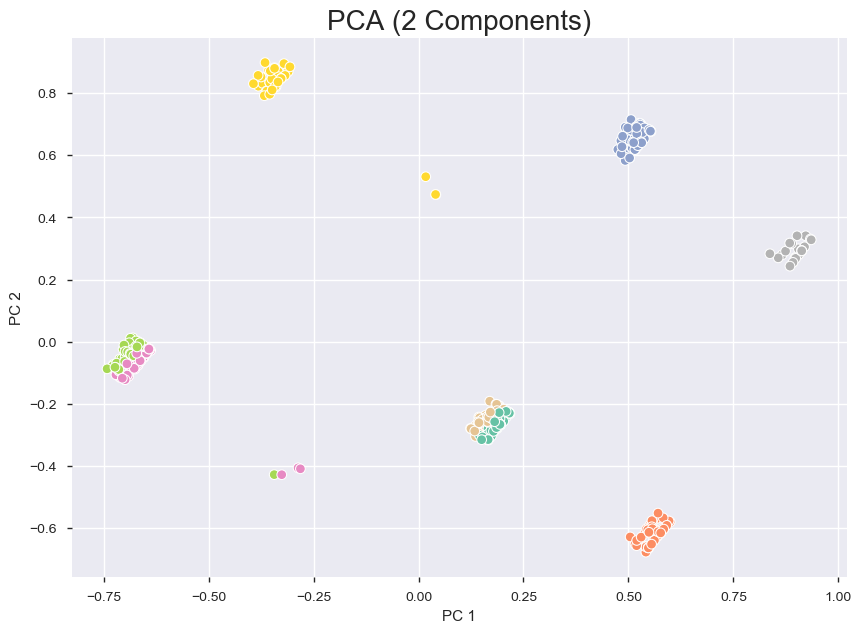

In [67]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components)', fontsize=20)
sns.scatterplot(ax = ax, x=pca_df['PC 1'], y=pca_df['PC 2'], 
                hue=pca_df['cluster'], legend=False, 
                palette=sns.color_palette('Set2'))

## Cluster Analysis

In [58]:
#Add labels to original subset
active_leads['cluster'] = k6_labels

In [61]:
import pandas_profiling as pp
eda_0 = pp.ProfileReport(active_leads[active_leads['cluster']==0])

display(eda_0)

Number of variables,9
Number of observations,144
Total Missing (%),0.0%
Total size in memory,9.6 KiB
Average record size in memory,68.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,4


In [72]:
test_df = pca_df.copy()
test_df.head()

,PC 1,PC 2,PC 3,cluster
0,0.513165,0.677293,-0.276376,2
1,0.529410,0.699709,-0.332220,2
2,0.528395,0.644833,-0.107907,2
3,0.175919,-0.230638,-0.528392,6
4,0.493156,0.671082,-0.238407,2
